In [1]:
import os
import glob

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np

In [5]:
from PIL import Image

### Loading Data

In [20]:
ox_data_path = os.path.join(os.getcwd(),"datasets","ox_data","cats")
paths = glob.glob(ox_data_path + '\\*\\*.jpg')

In [21]:
print('Total number of images: ', len(paths))

Total number of images:  2400


### Create dataset

use imagedatagenerator as dataset for real time data argumentation

In [22]:
image_generator = ImageDataGenerator(
        rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, rescale=1./255,
        shear_range=0.1, zoom_range=0.1, horizontal_flip=True,fill_mode='nearest',
        validation_split = 0.25)

In [23]:
train_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'training')
valid_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'validation')

Found 1800 images belonging to 12 classes.
Found 600 images belonging to 12 classes.


In [24]:
# get a batch of images example
sample_training_images, sample_targets = next(train_gen)

In [25]:
# function for plotting images and its class

#train_gen.class_indices.keys()
#train_gen.class_indices
target_classes = [breed for breed in train_gen.class_indices.keys()]

def plot_images(images_arr,target_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, target, ax in zip( images_arr, target_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(target_classes[np.argmax(target)])
    plt.tight_layout()
    plt.show()

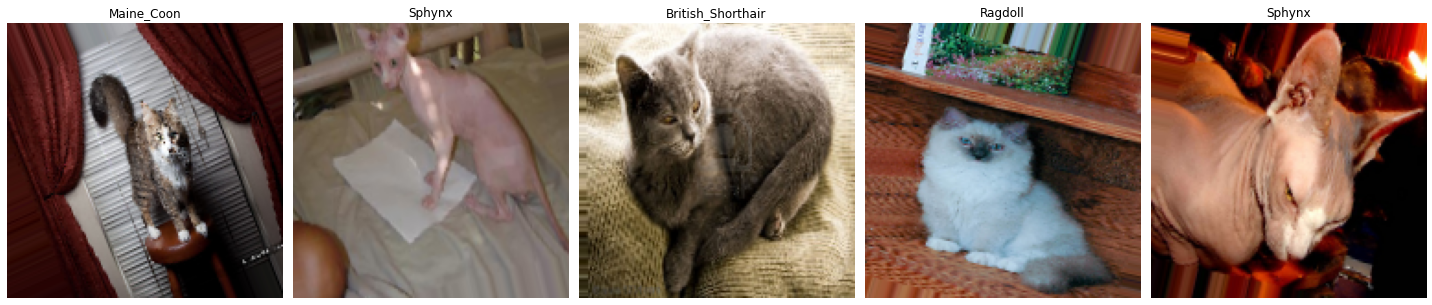

In [13]:
plot_images(sample_training_images[:5],sample_targets[:5])

### Classical CNN Model

Building a classic CNN model which trains everything from beginning

In [ ]:
# create dataset
image_generator = ImageDataGenerator(
        rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, rescale=1./255,
        shear_range=0.1, zoom_range=0.1, horizontal_flip=True,fill_mode='nearest',
        validation_split = 0.25)
train_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'training')
valid_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'validation')

In [59]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=[150,150,3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32,3,activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64,3,activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(12, activation="softmax")
])

In [61]:
optimizer = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [62]:
history = model.fit(
    train_gen,
    steps_per_epoch=1800 // 32,
    epochs=50,
    validation_data=valid_gen,
    validation_steps=600 // 32
)

Epoch 1/50
56/56 [==============================] - 12s 209ms/step - loss: 2.4893 - accuracy: 0.0843 - val_loss: 2.4767 - val_accuracy: 0.1372
Epoch 2/50
56/56 [==============================] - 12s 210ms/step - loss: 2.4132 - accuracy: 0.1567 - val_loss: 2.2498 - val_accuracy: 0.2309
Epoch 3/50
56/56 [==============================] - 12s 210ms/step - loss: 2.2973 - accuracy: 0.2025 - val_loss: 2.1675 - val_accuracy: 0.2674
Epoch 4/50
56/56 [==============================] - 12s 209ms/step - loss: 2.2447 - accuracy: 0.2019 - val_loss: 2.0687 - val_accuracy: 0.2726
Epoch 5/50
56/56 [==============================] - 12s 212ms/step - loss: 2.1617 - accuracy: 0.2296 - val_loss: 2.0549 - val_accuracy: 0.2743
Epoch 6/50
56/56 [==============================] - 12s 211ms/step - loss: 2.1617 - accuracy: 0.2590 - val_loss: 1.9946 - val_accuracy: 0.2986
Epoch 7/50
56/56 [==============================] - 12s 211ms/step - loss: 2.1112 - accuracy: 0.2613 - val_loss: 1.9853 - val_accuracy: 0.2986

This model achieves about 45% validation accuracy with dropout and a bit more complex data augmentation. Both training and validation accuracy is at around 45%.

In [65]:
model.save_weights('first_try.h5')

Since there are very few data samples, I will try to use less data augmentation to let the model fits better

In [63]:
# apply less augmentation to the data
image_generator = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,validation_split = 0.25)

In [64]:
train_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'training')
test_gen = image_generator.flow_from_directory(ox_data_path,target_size=(150,150), subset = 'validation')

Found 1800 images belonging to 12 classes.
Found 600 images belonging to 12 classes.


In [66]:
history = model.fit(
    train_gen,
    steps_per_epoch=1800 // 32,
    epochs=35,
    validation_data=test_gen,
    validation_steps=600 // 32
)

Epoch 1/35
56/56 [==============================] - 12s 210ms/step - loss: 1.3178 - accuracy: 0.5229 - val_loss: 1.3701 - val_accuracy: 0.4809
Epoch 2/35
56/56 [==============================] - 12s 210ms/step - loss: 1.3002 - accuracy: 0.5283 - val_loss: 1.3956 - val_accuracy: 0.4722
Epoch 3/35
56/56 [==============================] - 12s 209ms/step - loss: 1.2730 - accuracy: 0.5481 - val_loss: 1.4507 - val_accuracy: 0.4444
Epoch 4/35
56/56 [==============================] - 12s 208ms/step - loss: 1.2704 - accuracy: 0.5277 - val_loss: 1.4280 - val_accuracy: 0.4792
Epoch 5/35
56/56 [==============================] - 12s 208ms/step - loss: 1.2293 - accuracy: 0.5469 - val_loss: 1.5075 - val_accuracy: 0.4740
Epoch 6/35
56/56 [==============================] - 12s 208ms/step - loss: 1.1977 - accuracy: 0.5617 - val_loss: 1.4198 - val_accuracy: 0.4931
Epoch 7/35
56/56 [==============================] - 12s 211ms/step - loss: 1.1429 - accuracy: 0.5837 - val_loss: 1.4525 - val_accuracy: 0.4792

This model achieves around 50% validation accuracy with dropout and less augmentation. The model fits trainning data more closely with 75%, but the validation accuracy also increased to 50%.

In [67]:
model.save_weights('second_try.h5')

Third attempt is go without dropout to see if performance increase with more fitting power.

In [68]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=[150,150,3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32,3,activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64,3,activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(12, activation="softmax")
])

In [70]:
optimizer = keras.optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [71]:
history = model2.fit(
    train_gen,
    steps_per_epoch=1800 // 32,
    epochs=35,
    validation_data=test_gen,
    validation_steps=600 // 32
)

Epoch 1/35
56/56 [==============================] - 12s 209ms/step - loss: 2.4563 - accuracy: 0.1278 - val_loss: 2.3305 - val_accuracy: 0.1719
Epoch 2/35
56/56 [==============================] - 12s 210ms/step - loss: 2.2095 - accuracy: 0.2398 - val_loss: 2.0477 - val_accuracy: 0.2656
Epoch 3/35
56/56 [==============================] - 12s 209ms/step - loss: 1.9986 - accuracy: 0.3173 - val_loss: 1.9534 - val_accuracy: 0.2951
Epoch 4/35
56/56 [==============================] - 12s 211ms/step - loss: 1.8378 - accuracy: 0.3693 - val_loss: 1.9384 - val_accuracy: 0.3559
Epoch 5/35
56/56 [==============================] - 12s 215ms/step - loss: 1.7628 - accuracy: 0.3824 - val_loss: 1.9898 - val_accuracy: 0.3385
Epoch 6/35
56/56 [==============================] - 12s 216ms/step - loss: 1.6763 - accuracy: 0.4259 - val_loss: 1.8168 - val_accuracy: 0.3542
Epoch 7/35
56/56 [==============================] - 12s 215ms/step - loss: 1.5089 - accuracy: 0.4808 - val_loss: 1.8432 - val_accuracy: 0.3663

This model has no dropout, and the validation accuracy is at around 42%. The accuracy on the training data is actually 97% which is very high while the validation accuracy is at 43%. This model is clearly overfitting.

Over the three models which I train from scratch, the second model performs the best.

In [72]:
model2.save_weights('third_try.h5')

### Pretrained model

In [ ]:
# resources:
# https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
# https://www.tensorflow.org/tutorials/images/transfer_learning
# https://www.kdnuggets.com/2019/11/deep-learning-image-classification-less-data.html
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html (great example)
# https://www.tensorflow.org/tutorials/images/classification
# https://www.tensorflow.org/guide/data

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [8]:
model = ResNet50(weights='imagenet')

Single image prediction

In [9]:
img_path = paths[600]
img_path

img = mpimg.imread(img_path)

# resize into the image size for the pretrained model
resized_image = tf.image.resize(img,(224,224))

plt.imshow(resized_image/255.0)

'C:\\Machine Learning Projects\\Cat Breed Classifier\\datasets\\ox_data\\cats\\Bombay\\Bombay_1.jpg'

In [14]:
# using the pretrained model's preprocess function to process the image 
x = keras.applications.resnet50.preprocess_input(resized_image)
x = np.expand_dims(x,axis=0)
y_proba = model.predict(x)

# print the result label from pretrained model
top_K = keras.applications.resnet50.decode_predictions(y_proba, top=3)
for image_index in range(len(x)):
    print("Image #{}".format(image_index))
    for class_id, name, y_prob in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_prob * 100))
    print()

(1, 1000)

Using data augmentation dataset 

In [16]:
image_size = (224,224)

In [17]:
image_generator = ImageDataGenerator(
    rotation_range=15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
    validation_split = 0.25,preprocessing_function = keras.applications.resnet50.preprocess_input)

In [18]:
train_gen = image_generator.flow_from_directory(ox_data_path,
                                                target_size=image_size, subset = 'training')
test_gen = image_generator.flow_from_directory(ox_data_path,
                                               target_size=image_size, subset = 'validation')

Found 1800 images belonging to 12 classes.
Found 600 images belonging to 12 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


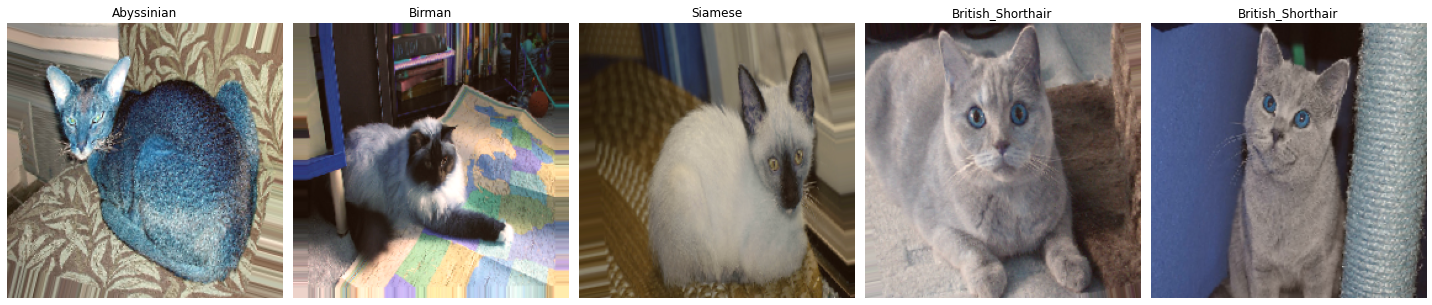

In [23]:
sample_training_images, sample_targets = next(train_gen)
plot_images(sample_training_images[:5]/255.0+0.5,sample_targets[:5])

In [24]:
Y_proba = model.predict(sample_training_images[:5])

In [25]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(sample_training_images[:5])):
    print("Image #{}".format(image_index))
    for class_id, name, y_prob in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_prob * 100))
    print()

Image #0
  n01877812 - wallaby      11.05%
  n07754684 - jackfruit    8.58%
  n02119022 - red_fox      8.39%

Image #1
  n02871525 - bookshop     30.94%
  n02123597 - Siamese_cat  17.44%
  n02086079 - Pekinese     12.14%

Image #2
  n02123597 - Siamese_cat  99.79%
  n02127052 - lynx         0.07%
  n04554684 - washer       0.03%

Image #3
  n02124075 - Egyptian_cat 23.52%
  n02123159 - tiger_cat    23.11%
  n02127052 - lynx         18.22%

Image #4
  n02124075 - Egyptian_cat 49.12%
  n02127052 - lynx         16.67%
  n02971356 - carton       5.69%



In the pretrained model, the dataset used for training is imagenet. It is a big dataset with a lot of class such as egyptian cat and siamese cat. It has some overlap with our task which makes this model very useful.

In [167]:
# resources:
# https://keras.io/api/applications/
# https://github.com/google-research/noisystudent

### Pretrained Model and fine-tuning

In [16]:
image_size = (224,224)

image_generator = ImageDataGenerator(
    rotation_range=15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
    validation_split = 0.25,preprocessing_function = keras.applications.resnet50.preprocess_input)

train_gen = image_generator.flow_from_directory(ox_data_path,
                                                target_size=image_size, subset = 'training')
valid_gen = image_generator.flow_from_directory(ox_data_path,
                                               target_size=image_size, subset = 'validation')

Found 1800 images belonging to 12 classes.
Found 600 images belonging to 12 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


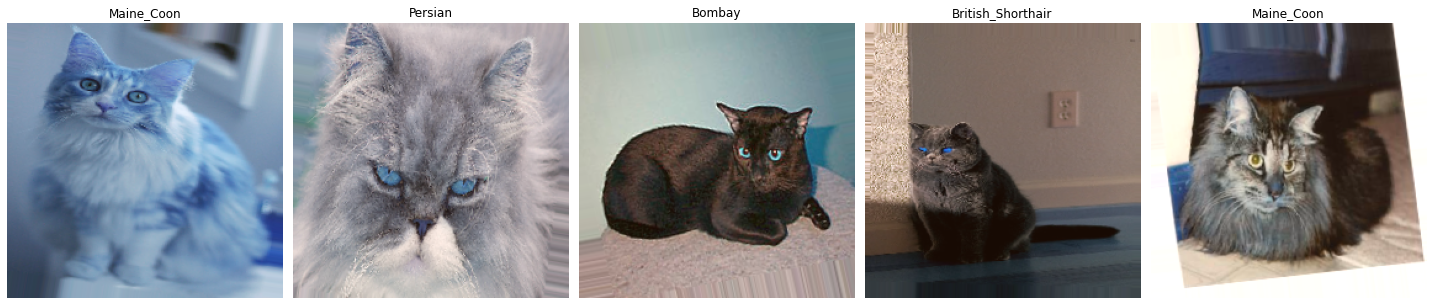

In [17]:
sample_training_images, sample_targets = next(train_gen)
plot_images(sample_training_images[:5]/255.0+0.5,sample_targets[:5])

use the pretrained model as feature selector, and build my own prediction layers above it

In [ ]:
base_model = ResNet50(input_shape=(224,224,3),weights='imagenet',include_top=False)
feature_batch = base_model(sample_training_images)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
prediction_layer = tf.keras.layers.Dense(12, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)

In [ ]:
print(feature_batch.shape)
print(feature_batch_average.shape)
print(prediction_batch.shape)

Freeze the pretrained bottom layers, and tune the top few prediction layers which I just added.

In [44]:

base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [24]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=[tf.metrics.CategoricalAccuracy(name='accuracy')])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                24588     
Total params: 23,612,300
Trainable params: 24,588
Non-trainable params: 23,587,712
_________________________________________________________________


In [65]:
len(model.trainable_variables)


2

In [66]:
loss0,accuracy0 = model.evaluate(test_gen,steps = 600 // 32)

18/18 [==============================] - 5s 276ms/step - loss: 0.4635 - accuracy: 0.8750


In [67]:
history = model.fit(
    train_gen,
    steps_per_epoch=1800 // 32,
    epochs=10,
    validation_data=valid_gen,
    validation_steps=600 // 32
)

Epoch 1/10
56/56 [==============================] - 22s 390ms/step - loss: 0.4268 - accuracy: 0.8840 - val_loss: 0.4716 - val_accuracy: 0.8504
Epoch 2/10
56/56 [==============================] - 23s 415ms/step - loss: 0.3966 - accuracy: 0.8925 - val_loss: 0.4992 - val_accuracy: 0.8486
Epoch 3/10
56/56 [==============================] - 25s 441ms/step - loss: 0.3862 - accuracy: 0.8908 - val_loss: 0.4539 - val_accuracy: 0.8486
Epoch 4/10
56/56 [==============================] - 25s 446ms/step - loss: 0.3728 - accuracy: 0.9005 - val_loss: 0.4259 - val_accuracy: 0.8750
Epoch 5/10
56/56 [==============================] - 30s 532ms/step - loss: 0.3425 - accuracy: 0.9067 - val_loss: 0.4110 - val_accuracy: 0.8785
Epoch 6/10
56/56 [==============================] - 67s 1s/step - loss: 0.3333 - accuracy: 0.9067 - val_loss: 0.4049 - val_accuracy: 0.8715
Epoch 7/10
56/56 [==============================] - 22s 400ms/step - loss: 0.3085 - accuracy: 0.9202 - val_loss: 0.3912 - val_accuracy: 0.8768
Ep

Unfrozen top of the pretrained model and fine tune it to my own task with lower learning rate.

In [29]:
base_model.trainable = True

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [30]:
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=[tf.metrics.CategoricalAccuracy(name='accuracy')])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                24588     
Total params: 23,612,300
Trainable params: 19,477,516
Non-trainable params: 4,134,784
_________________________________________________________________


In [71]:
len(model.trainable_variables)

92

In [72]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = model.fit(train_gen,
                         epochs=total_epochs,
                         initial_epoch =  10,
                         validation_data=test_gen,
                         steps_per_epoch=1800 // 32,
                         validation_steps=600 // 32
                        )
                         

Epoch 11/20
56/56 [==============================] - 23s 402ms/step - loss: 0.3611 - accuracy: 0.8942 - val_loss: 0.3370 - val_accuracy: 0.8750
Epoch 12/20
56/56 [==============================] - 22s 390ms/step - loss: 0.2759 - accuracy: 0.9242 - val_loss: 0.2916 - val_accuracy: 0.9085
Epoch 13/20
56/56 [==============================] - 23s 406ms/step - loss: 0.2047 - accuracy: 0.9485 - val_loss: 0.2949 - val_accuracy: 0.8961
Epoch 14/20
56/56 [==============================] - 22s 394ms/step - loss: 0.1769 - accuracy: 0.9564 - val_loss: 0.2952 - val_accuracy: 0.8908
Epoch 15/20
56/56 [==============================] - 22s 388ms/step - loss: 0.1429 - accuracy: 0.9683 - val_loss: 0.2549 - val_accuracy: 0.9014
Epoch 16/20
56/56 [==============================] - 23s 410ms/step - loss: 0.1147 - accuracy: 0.9762 - val_loss: 0.2609 - val_accuracy: 0.8996
Epoch 17/20
56/56 [==============================] - 23s 413ms/step - loss: 0.0935 - accuracy: 0.9870 - val_loss: 0.2642 - val_accuracy:

This model achieves 99% for training set and 93% for validation set. It beats the training from scratch model by a lot.

### Make predictions on a new batch in valid data set

In [34]:
sample_training_images, sample_targets = next(test_gen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


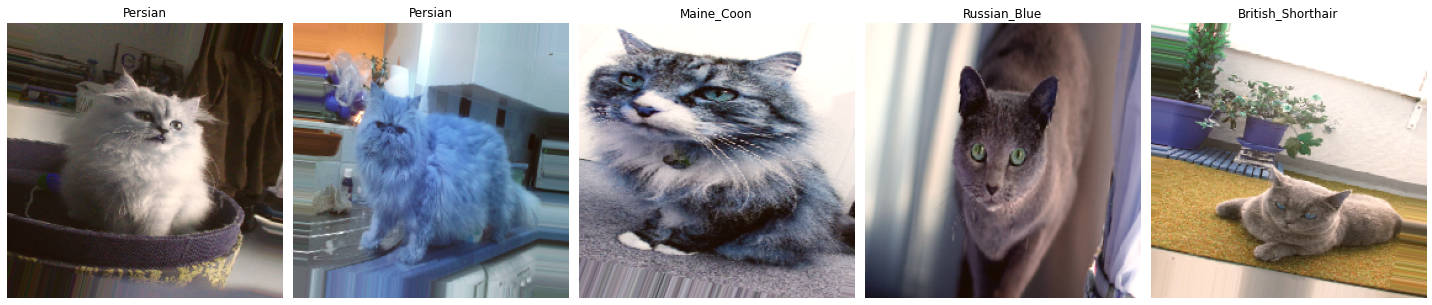

In [35]:
plot_images(sample_training_images[:5]/255.0+0.5,sample_targets[:5])

In [36]:
Y_proba = model.predict(sample_training_images[:5])

In [37]:
Y_proba.shape

(5, 12)

In [38]:
[target_classes[prob] for prob in np.argmax(Y_proba,axis=1)]

['Ragdoll', 'Persian', 'Maine_Coon', 'Russian_Blue', 'British_Shorthair']

In [83]:
model.save_weights("Fine_tuned_model.h5")

In [32]:
model.load_weights("Fine_tuned_model.h5")

testing online image

In [39]:
persian_image = mpimg.imread("persian_online.jpg")

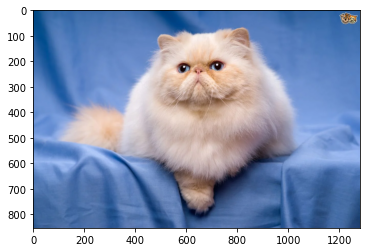

In [40]:
plt.imshow(persian_image)

In [41]:
resized_image = tf.image.resize(persian_image,(224,224))

In [42]:
x = keras.applications.resnet50.preprocess_input(resized_image)

x = np.expand_dims(x,axis=0)

y_proba = model.predict(x)

y_proba.shape

(1, 12)

In [43]:
[target_classes[prob] for prob in np.argmax(y_proba,axis=1)]

['Persian']

Working well

### Save and Serve the model

In [15]:
model_version = '0001'
model_name= 'my_cat_breed_model'
model_path = os.path.join(model_name,model_version)

In [50]:
tf.saved_model.save(model,model_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_cat_breed_model\0001\assets


In [51]:

# https://www.tensorflow.org/tfx/serving/serving_basic

Preprocess functions for prediction

In [6]:
def preprocess(img_path):
    img = mpimg.imread(img_path)
    resized_image = tf.image.resize(img,(224,224))
    x = keras.applications.resnet50.preprocess_input(resized_image)
    x = np.expand_dims(x,axis=0)
    return x

In [16]:
saved_model = tf.saved_model.load(model_path)

In [17]:
y_pred = saved_model(preprocess("persian_online.jpg"))

In [18]:
[target_classes[prob] for prob in np.argmax(y_pred,axis=1)]

['Persian']

### Serving the model via docker and getting predictions from it

In [1]:
# command line:

# tensorflow command to run the model for prediction
# saved_model_cli run --dir my_cat_breed_model/0001 --tag_set serve --signature_def serving_default --inputs resnet50_input=test_cat_image.npy

# 
# SET var=%cd%    (get the current directory)

# docker command to run the server
# docker run -it --rm -p 8500:8500 -p8501:8501 -v "%var%\my_cat_breed_model:/models/my_cat_breed_model" -e MODEL_NAME=my_cat_breed_model tensorflow/serving

In [7]:
X_new = preprocess("persian_online.jpg")

In [20]:
np.save("test_cat_image.npy",X_new)

In [8]:
X_new.shape

(1, 224, 224, 3)

In [9]:
import json

input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances":X_new.tolist(),
})

In [10]:
input_data_json

'{"signature_name": "serving_default", "instances": [[[[27.060997009277344, -46.77899932861328, -123.68000030517578], [28.060997009277344, -45.77899932861328, -122.68000030517578], [29.846717834472656, -42.9932861328125, -121.894287109375], [31.560997009277344, -41.27899932861328, -119.18000030517578], [37.275291442871094, -35.350425720214844, -106.8228530883789], [42.91814422607422, -28.850425720214844, -91.75142669677734], [46.060997009277344, -24.77899932861328, -88.68000030517578], [51.060997009277344, -20.77899932861328, -82.68000030517578], [55.060997009277344, -17.77899932861328, -75.68000030517578], [58.63243865966797, -14.421852111816406, -72.894287109375], [60.560997009277344, -11.778999328613281, -71.18000030517578], [61.14757537841797, -11.692420959472656, -69.59342956542969], [62.86902618408203, -10.374984741210938, -67.27598571777344], [62.86902618408203, -10.374984741210938, -67.27598571777344], [61.060997009277344, -12.778999328613281, -68.68000030517578], [60.060997009

In [11]:
import requests

In [12]:
SERVER_URL = "http://localhost:8501/v1/models/my_cat_breed_model:predict"

In [13]:
response = requests.post(SERVER_URL,data=input_data_json)

In [14]:
response.raise_for_status()

In [15]:
response = response.json()

In [16]:
y_proba = np.array(response["predictions"])

In [17]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [26]:
[target_classes[prob] for prob in np.argmax(y_proba,axis=1)]

['Persian']

Summary:
In this project, I followed the general machine learning precedure: 
First collecting the data for the task(cat breed classification); then I processed the data into the expected input directories for tensorflow image data generator; next I trained a model from scratch to see the performance. It turnes out the few models I trained only achieve 45% accuracy on validation set. Then I use the pretrain model plus my own classification head method to train a new model. This model is doing very well(achieving 93% accuracy). This is probably because the pretrained model contains a very good features of the regular images. And I chose a good dataset for this pretrained model, the imagenet dataset. This dataset even contains Siamese_cat and Egyptian_cat as class. By adding my own classification head, I am able to use these information and train a good model. And at the end, I tested the model in command line and also tested that it is avalible to serve online.